<a href="https://colab.research.google.com/github/temple17/self-review/blob/main/California_housing_price_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step1.Import libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px

import os
import tarfile
import urllib.request

!pip install geopandas
import geopandas as gpd
!pip install geoplot
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc

# Step2. Data Preparation 
## Download the dataset

In [98]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [99]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [100]:
fetch_housing_data()

In [101]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [102]:
housing = load_housing_data()

# Step3.EDA


## 3-1. Univariate Analysis (Histogram)

In [103]:
housing.info()
# 207 null values in total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [104]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6628ba290>,
      dtype=object)

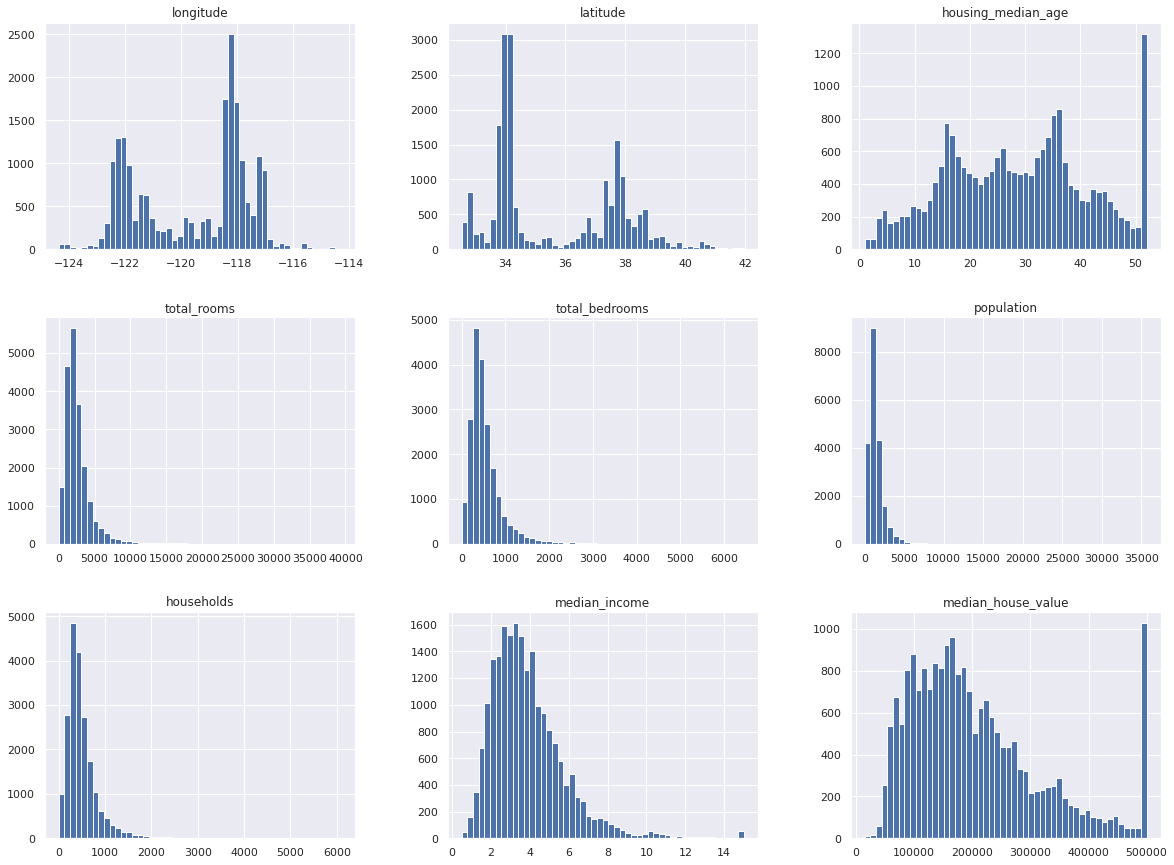

In [105]:
housing.hist(bins = 50, figsize = (20, 15))

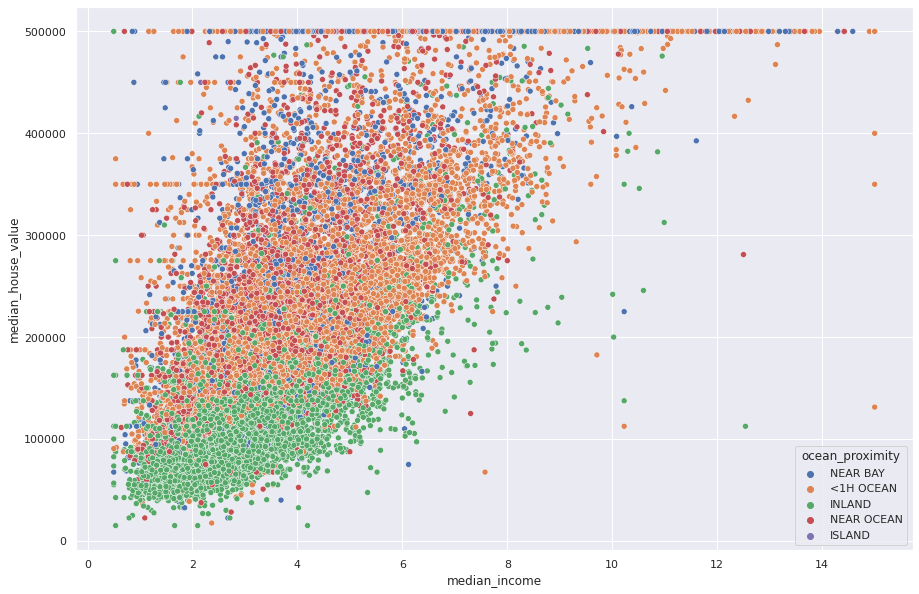

In [106]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = housing, x = 'median_income', y = 'median_house_value', hue = 'ocean_proximity')

In [109]:
housing['value_range'] = pd.cut(housing['median_house_value'], 5, labels = ['1','2','3','4','5'])

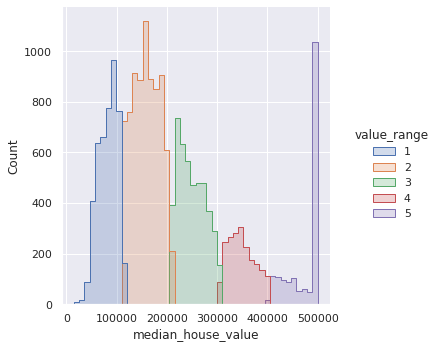

In [110]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.displot(housing, x = 'median_house_value', hue = 'value_range', element = 'step')

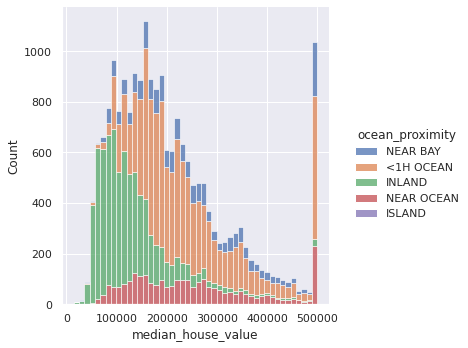

In [111]:
sns.set(rc={'figure.figsize':(20, 15)})
sns.displot(housing, x = 'median_house_value', hue = 'ocean_proximity', multiple = 'stack')

In [112]:
housing.groupby(['ocean_proximity']).size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

## 3.2 Bivariate Analysis

## 3.3 Null values imputation

In [113]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
value_range             0
dtype: int64

In [114]:
housing[housing['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,value_range
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,2
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,1
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,3
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,2
...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,3
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,2
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,5
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,3


### 3.3.1 kNN Unsupervised Learning Imputation

In [115]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe
def impute_knn(df):
    # seperate dataframe into numerical/categorical
    ldf = housing.select_dtypes(include=[np.number]) # select numerical columns in housing
    ldf_putaside = housing.select_dtypes(exclude = [np.number]) # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()
    cols_no_nan = ldf.columns.difference(cols_nan).values

    for col in cols_nan:
        imp_test = ldf[ldf[col].isna()]
        imp_train = ldf.dropna()
        model = KNeighborsRegressor(n_neighbors=5)
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[housing[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    return pd.concat([ldf, ldf_putaside], axis = 1)

In [116]:
housing = impute_knn(housing)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [117]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20640 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  value_range         20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


## 3.4 Detect Outliers
- **Odd Patterns & Outliers**   
히스토그램에 따르면 median_house_age와 median_house_value에 outlier가 존재할 가능성이 있다.
- **Less Noticeable Outliers**   
6개의 feature가 skewed된 pattern을 보이고 있지만, 조금은 신경쓰면서 진행하면 될 듯하다.     
몇몇의 feature의 x축이 지나치게 광범위해서 transformation이 필요해보인다.   
total_bedrooms와 population, 그리고 total_rooms가 거의 동일한 분포를 보인다.


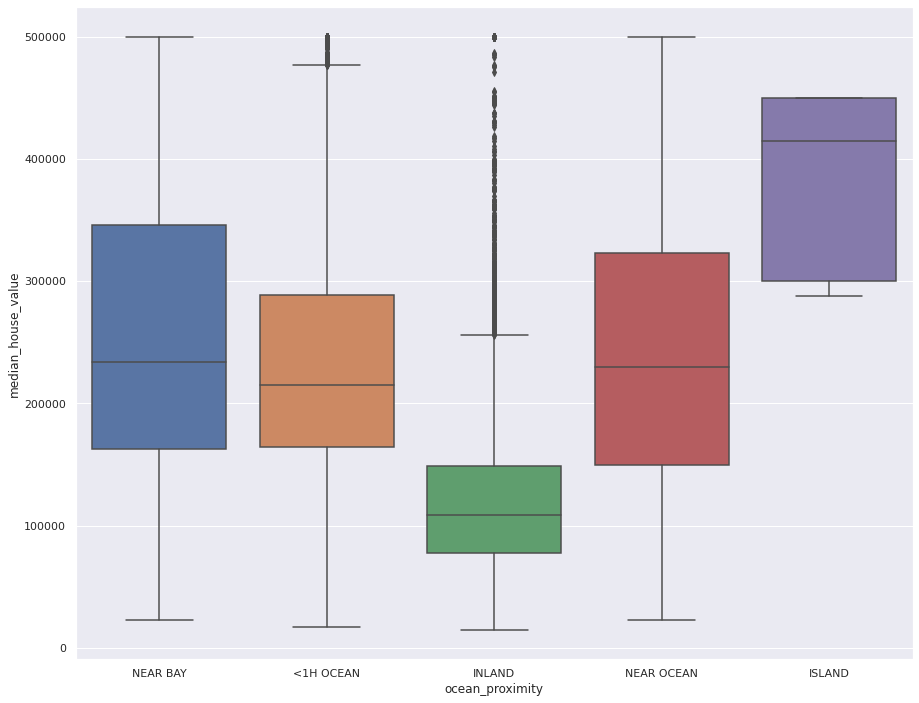

In [118]:
plt.figure(figsize = (15,12))
sns.boxplot(data = housing, x = 'ocean_proximity', y = 'median_house_value')

## 3.5 Bivariate Correlation Matrix

In [119]:
def corrMat(dataset, id = False):
    corr_mat = housing.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat, mask = mask, vmin = -1, vmax= 1, center=0,
                cmap = 'RdPu_r', square = False, lw=2, annot = True, cbar = True);plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


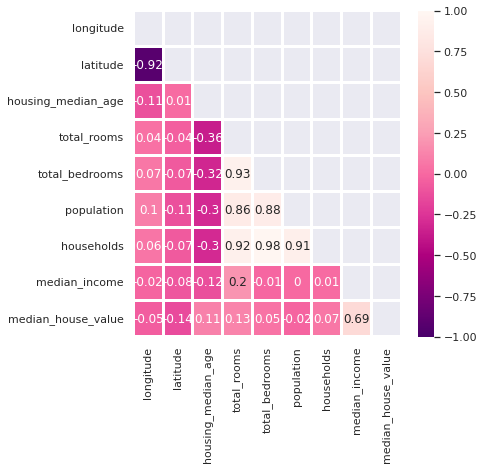

In [120]:
corrMat(housing)

## 3.6 Bivariate Scattered Data
- Irregular pattern or outliers
- two dimensional data clusters
- two feature correlation value visualization

In [121]:
def snsPairGrid(dataset):
    g = sns.PairGrid(dataset, diag_sharey = False)
    g.map_lower(sns.scatterplot, s = 13, edgecolor = 'k', alpha= 0.4)
    g.map_lower(sns.kdeplot, cmap = 'plasma', n_levels=10)
    g.map_diag(sns.kdeplot, lw = 2)
    plt.tight_layout()

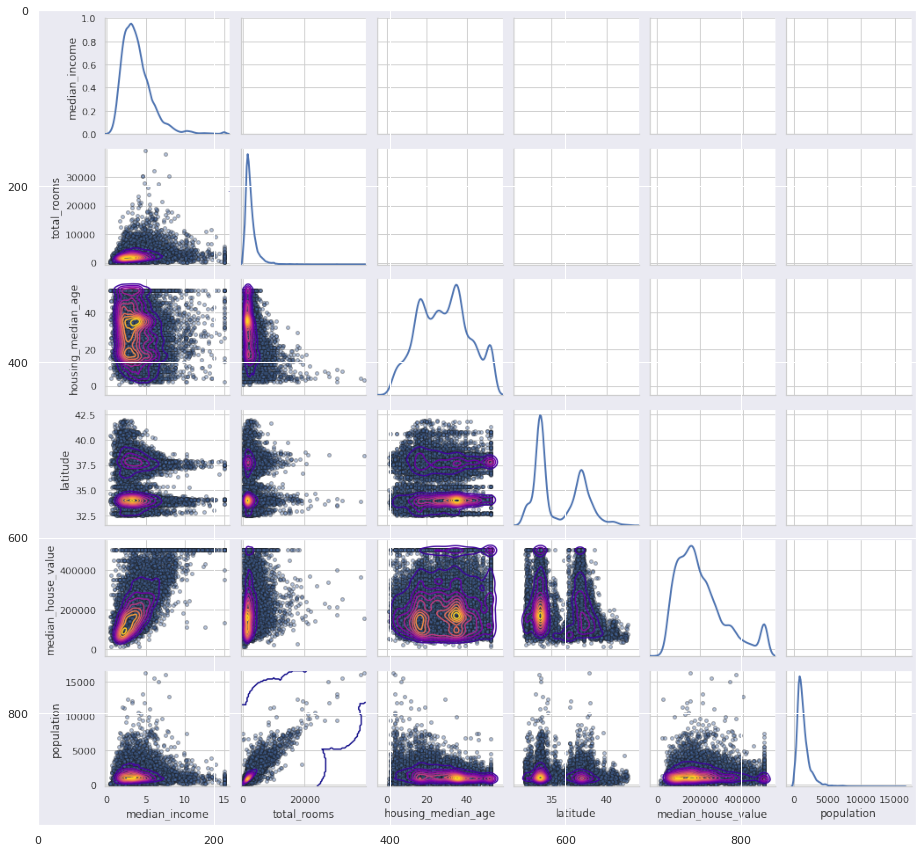

In [122]:
# Too large
# hlist = ['median_income','total_rooms', 'housing_median_age', 'latitude','median_house_value', 'population']
# snsPairGrid(housing[hlist])
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/EDA/pairplot.png')
plt.imshow(img)

# img_source : 'https://www.kaggle.com/code/shtrausslearning/bayesian-regression-house-price-prediction#3-|-EXPLORATORY-DATA-ANALYSIS'

**결과**
- median_income & median_house_value : quite linear
- median_house_value & median_house_age : 2 peaks roughtly apart 20 years
- median_house_value & total_rooms,population : a bit larger values & a lot of data outside the main clusters, classifiable as **outliers**
- scailing should be considered

## 3.7 Geospatial Multivariate data

In [123]:
cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
print(cali.crs)

epsg:4326


In [124]:
housing_gpd = gpd.GeoDataFrame(housing, geometry = gpd.points_from_xy(housing['longitude'], housing['latitude']))
housing_gpd.crs = {'init': 'epsg:4326'}

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


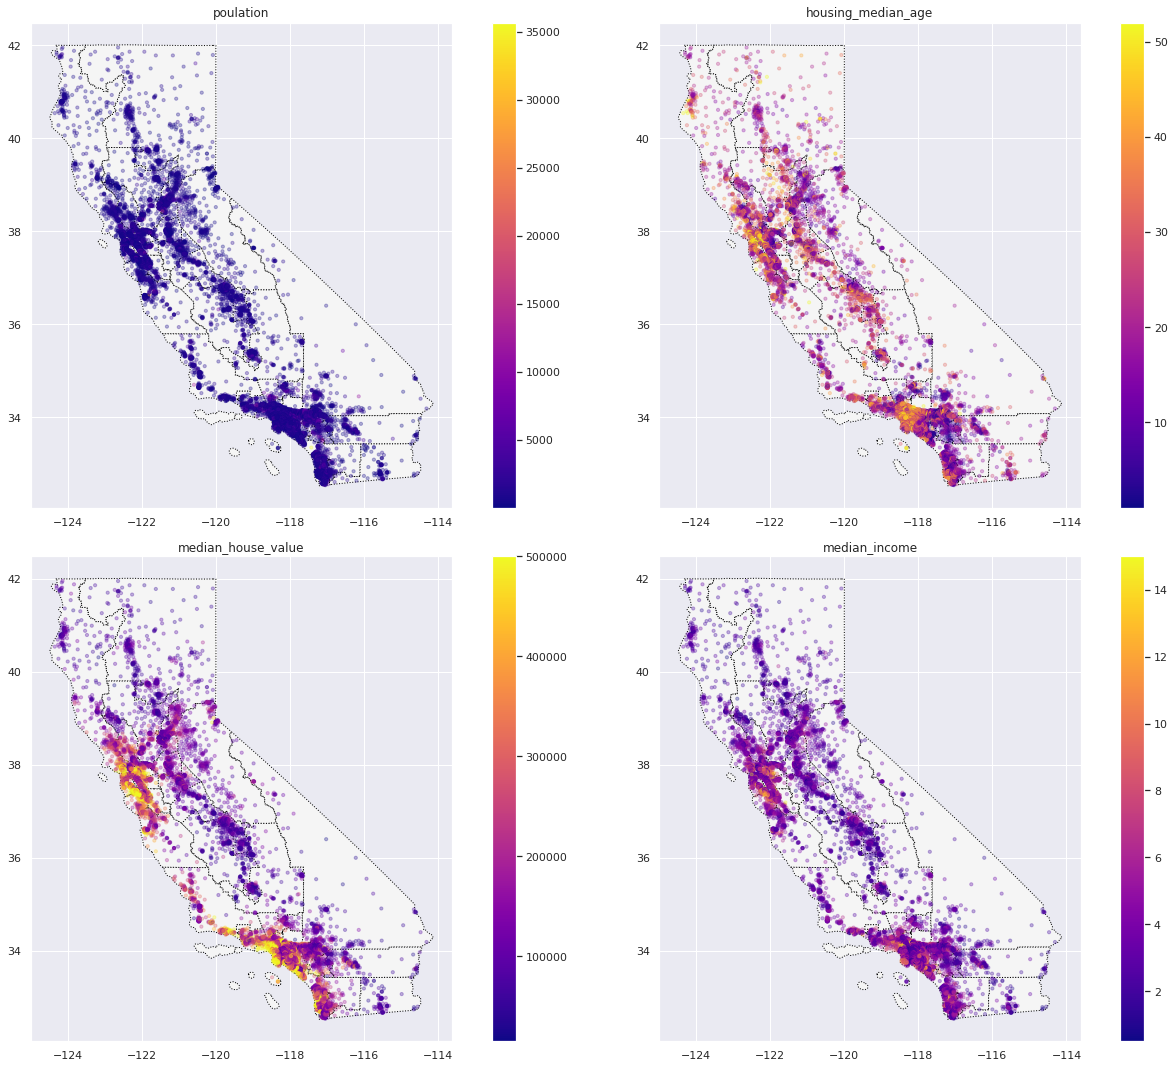

In [125]:
fig, ax = plt.subplots(2,2)

cali.plot(figsize = (8,6), color = 'whitesmoke', linestyle = ":", edgecolor="black", ax=ax[0,0])
housing_gpd.plot(column = 'population', ax = ax[0, 0], cmap = 'plasma', alpha=0.3, legend= True, s =10)
ax[0,0].set_title('poulation')

cali.plot(figsize = (8,6), color = 'whitesmoke', linestyle = ":", edgecolor="black", ax=ax[0,1])
housing_gpd.plot(column = 'housing_median_age', ax = ax[0,1], cmap = 'plasma', alpha=0.3, legend= True, s=10)
ax[0,1].set_title('housing_median_age')

cali.plot(figsize = (8,6), color = 'whitesmoke', linestyle = ":", edgecolor="black", ax=ax[1,0])
housing_gpd.plot(column = 'median_house_value', ax = ax[1,0], cmap = 'plasma', alpha=0.3, legend= True, s=10)
ax[1,0].set_title('median_house_value')

cali.plot(figsize = (8,6), color = 'whitesmoke', linestyle = ":", edgecolor="black", ax=ax[1,1])
housing_gpd.plot(column = 'median_income', ax = ax[1,1], cmap = 'plasma', alpha=0.3, legend= True, s=10)
ax[1,1].set_title('median_income')

plt.tight_layout()
plt.subplots_adjust(wspace = -0.2)

**결과**
- median_house_value : clear relation with geography(location) and median_house_income
- two main clusters from 'housing_median_age' have some linearity aspect
- Population is a little more tricky, have a few outliers

# Step4. Reviewing outliers

Outlier 1. housing_median_age == 52
Outlier 2. median_house_value == 500,001

In [126]:
maxval = housing['median_house_value'].max()

housing = housing[housing['median_house_value'] != maxval]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc66149f0d0>,
      dtype=object)

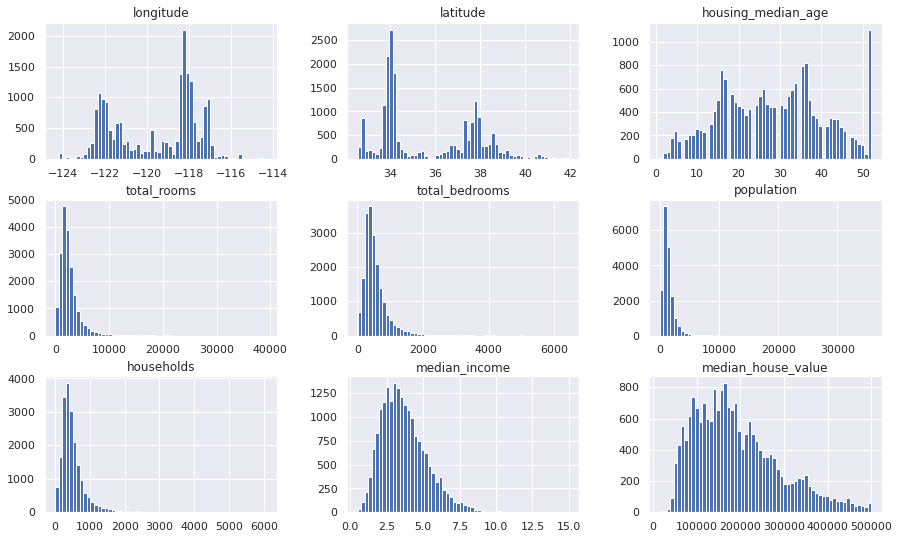

In [127]:
housing.hist(bins=60, figsize= (15,9))

# Step5. Feature Engineering

In [128]:
# housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
# housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
# housing['population_per_household'] = housing['population'] / housing['households']

In [129]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000
mean,-119.563192,35.651780,28.386277,2619.763659,539.327471,1440.812198,501.186023,3.676717,192477.921017
std,2.006108,2.149802,12.509113,2181.348207,421.434999,1143.648725,383.264636,1.570272,97711.509613
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,796.000000,282.000000,2.526800,116600.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1179.000000,411.000000,3.450000,173800.000000
75%,-117.990000,37.730000,37.000000,3120.000000,648.000000,1746.000000,606.000000,4.582600,248200.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


In [130]:
housing.corr()['median_house_value']

longitude            -0.046658
latitude             -0.148289
housing_median_age    0.067948
total_rooms           0.143139
total_bedrooms        0.075165
population            0.011964
households            0.094894
median_income         0.642611
median_house_value    1.000000
Name: median_house_value, dtype: float64

## 5.1 Handling Text and Cateogorical Attributes

In [131]:
housing_cat = housing[['ocean_proximity']]

In [132]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [133]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [134]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,value_range,geometry
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,POINT (-122.23000 37.88000)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,4,POINT (-122.22000 37.86000)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,4,POINT (-122.24000 37.85000)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,POINT (-122.25000 37.85000)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,POINT (-122.25000 37.85000)


# Step6. Select and Train a Model

In [136]:
housing.drop(['value_range'], axis = 1, inplace=True)

In [145]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1,2,3,4,5])

In [146]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19675 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           19675 non-null  float64 
 1   latitude            19675 non-null  float64 
 2   housing_median_age  19675 non-null  float64 
 3   total_rooms         19675 non-null  float64 
 4   total_bedrooms      19675 non-null  float64 
 5   population          19675 non-null  float64 
 6   households          19675 non-null  float64 
 7   median_income       19675 non-null  float64 
 8   median_house_value  19675 non-null  float64 
 9   ocean_proximity     19675 non-null  object  
 10  income_cat          19675 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 2.2+ MB


In [141]:
housing.drop(['geometry'], axis = 1, inplace=True)

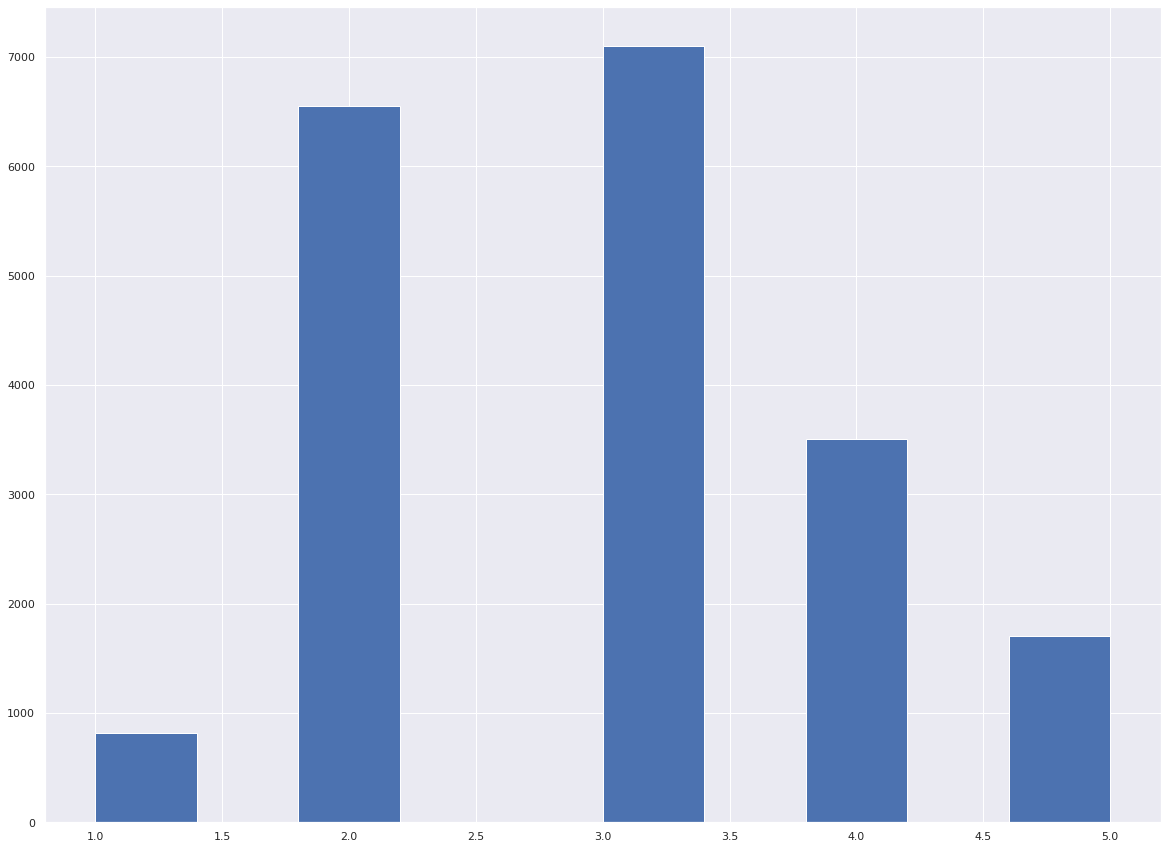

In [147]:
housing['income_cat'].hist()

In [149]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

In [150]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.361118
2    0.332910
4    0.177891
5    0.086658
1    0.041423
Name: income_cat, dtype: float64

In [151]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [152]:
housing = strat_train_set.copy()

In [153]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [154]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15740 entries, 38 to 9701
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15740 non-null  float64
 1   latitude            15740 non-null  float64
 2   housing_median_age  15740 non-null  float64
 3   total_rooms         15740 non-null  float64
 4   total_bedrooms      15740 non-null  float64
 5   population          15740 non-null  float64
 6   households          15740 non-null  float64
 7   median_income       15740 non-null  float64
 8   median_house_value  15740 non-null  float64
 9   ocean_proximity     15740 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


## Custom Transformation

In [155]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y =None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household= X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [156]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns = list(housing.columns)+["rooms_per_household", "population_per_household"],
    index = housing.index
)

## Transformation Pipelines

In [157]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
38,-122.26,37.83,52.0,1470.0,330.0,689.0,309.0,3.4800,191400.0
18744,-122.32,40.57,15.0,2524.0,449.0,1374.0,467.0,3.3816,93800.0
4905,-118.26,34.01,47.0,1269.0,323.0,1628.0,325.0,1.5089,115800.0
11193,-117.92,33.84,38.0,1316.0,263.0,671.0,278.0,3.2969,220000.0
19601,-120.98,37.57,27.0,925.0,176.0,449.0,168.0,2.6406,129700.0
...,...,...,...,...,...,...,...,...,...
9932,-122.30,38.29,25.0,1701.0,427.0,1021.0,399.0,3.0404,142100.0
7238,-118.13,34.01,40.0,2412.0,629.0,2119.0,600.0,2.0750,151100.0
3600,-118.50,34.23,26.0,3082.0,573.0,1590.0,586.0,4.5167,319000.0
11203,-117.91,33.84,25.0,1021.0,252.0,975.0,258.0,3.1250,168100.0


In [166]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num.values)

In [168]:
# from sklearn.compose import ColumnTransformer

# num_attribs = list(housing_num)
# cat_attribs = ['ocean_proximity']

# full_pipeline = ColumnTransformer([
#                                     ("num", num_pipeline, num_attribs),
#                                     ("cat", OneHotEncoder(), cat_attribs),
# ])

# housing_prepared = full_pipeline.fit_transform(housing)

In [160]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
38,-122.26,37.83,52.0,1470.0,330.0,689.0,309.0,3.4800,191400.0,NEAR BAY
18744,-122.32,40.57,15.0,2524.0,449.0,1374.0,467.0,3.3816,93800.0,INLAND
4905,-118.26,34.01,47.0,1269.0,323.0,1628.0,325.0,1.5089,115800.0,<1H OCEAN
11193,-117.92,33.84,38.0,1316.0,263.0,671.0,278.0,3.2969,220000.0,<1H OCEAN
19601,-120.98,37.57,27.0,925.0,176.0,449.0,168.0,2.6406,129700.0,INLAND


In [161]:
print(list(housing_num))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [169]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [170]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [171]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [172]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.34009174,  1.01157329,  1.8827453 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.36997407,  2.28691739, -1.07211871, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65206347, -0.76646117,  1.48343935, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.53253416, -0.66406128, -0.19364563, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82637705, -0.84558836, -0.27350682, ...,  0.        ,
         0.        ,  0.        ],
       [-1.02632729,  0.4716466 ,  0.44524389, ...,  0.        ,
         0.        ,  0.        ]])

In [173]:
old_housing_prepared.shape

(15740, 17)

In [174]:
housing_prepared = old_housing_prepared.copy()

In [177]:
housing_labels = strat_train_set['median_house_value'].copy()

In [178]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [180]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.582289554962229e-10

In [181]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

1.237846557713638e-10

In [183]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [184]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0